In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Visualizing vectors in 2D

The `plot_vectors` function plots a list of vectors in 2D space.

In [2]:
def plot_vectors(vectors, colors, scale=60):
    V = np.array([[0, 1], [1, 0]])  # ihat and jhat
    colors = ['k', 'k'] + colors
    V = np.vstack([V, np.hstack(vectors).T])
    
    plt.figure(figsize=(5, 5))
    plt.grid()
    
    origin = np.zeros(V.T.shape)
    plt.quiver(*origin, V[:,0], V[:,1], color=colors, scale=1, units='xy')
    
    lim = V.max() * 1.5
    
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)
    
    plt.show()

Let's look at some examples - $v_1$ and $v_2$

In [3]:
purple_1 = np.array([[2, 2]]).T
purple_2 = np.array([[-2, 3]]).T

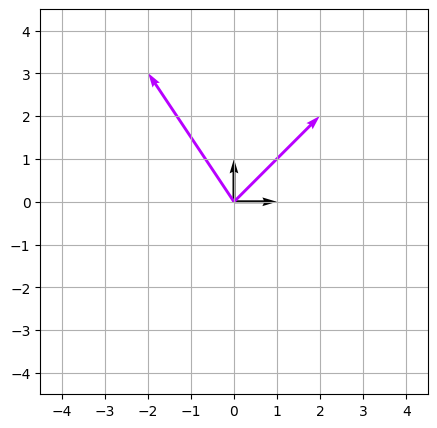

In [4]:
plot_vectors([purple_1, purple_2], colors=['#b800ff', '#b800ff'])

In [5]:
orange_1 = np.array([[1, 2]]).T
orange_2 = np.array([[4, -2]]).T

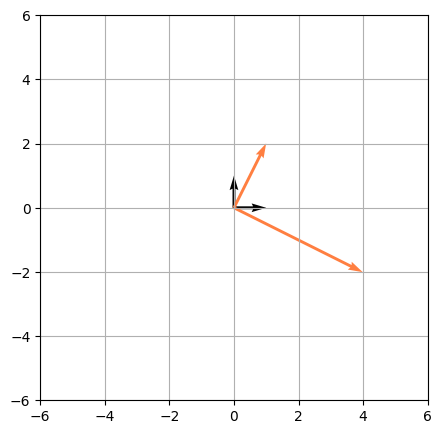

In [6]:
plot_vectors([orange_1, orange_2], colors=['#ff7f41', '#ff7f41'])

# Matrix Transformation

Say, $M$ is a 2D transformation matrix that that maps the purple vectors ($v1$, $v2$) to the orange vectors ($v1$, $v2$)
We can find M by : \
first changing the purple vectors tothe standard basis vectors of 2D vector space ( $\hat{i}$ and $\hat{j}$ )\
then applying another transformation that maps the standard basis vectors to the orange vectors. 

## step 1 : Purple to standard basis transformation ($P$)
the transformation matrix $P$ will be the inverse of the transformation matrix that maps the standard basis vectors to the purple vectors. let's call this matrix $P^{-1}$. 
$P$ will be the inverse of $P^{-1}$.


In [7]:
P_inv = np.hstack([purple_1, purple_2])
P = np.linalg.inv(P_inv)


Let's apply $P$ to one of the purple vectors $v_1$ to see if it maps to $\hat{i}$. the red vector is the transformed vector

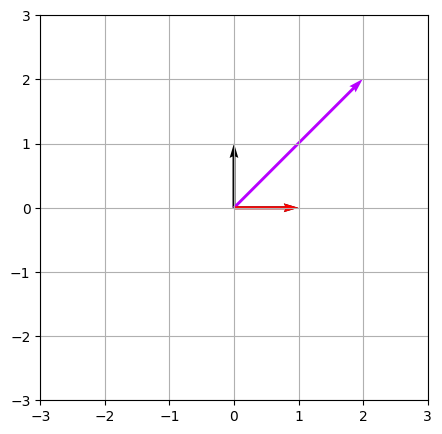

In [8]:
v = np.array(purple_1)
v_m = P.dot(v)
plot_vectors([v, v_m], colors=['#b800ff', 'r'])

The other purple vector will map to the vector $\hat{j}$

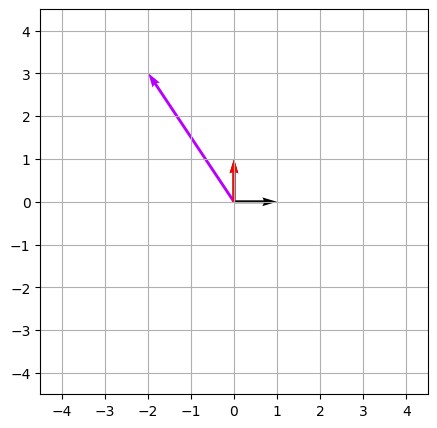

In [9]:
v = np.array(purple_2)
v_m = P.dot(v)
plot_vectors([v, v_m], colors=['#b800ff', 'r'])

## step 2 : standard basis to orange transformation ($Q$)
This section is simply the orange vectors as columns of a matrix. Let's call this matrix $Q$. 

In [10]:
Q = np.hstack([orange_1, orange_2])


This matrix transforms the basis vactors into the orange vectors.

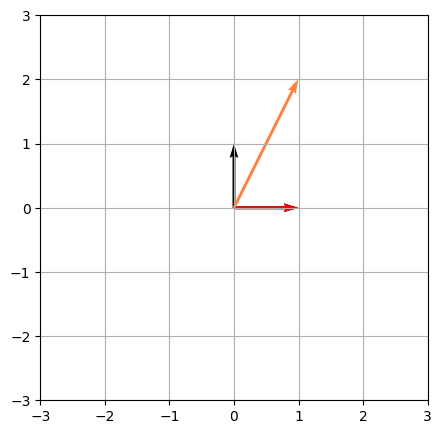

In [11]:
v = np.array([[1, 0]]).T
v_m = Q.dot(v)
plot_vectors([v, v_m], colors=['r', '#ff7f41'])

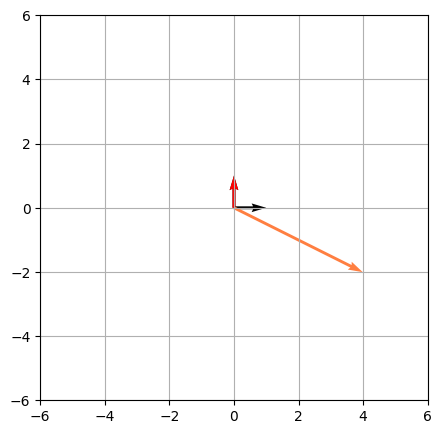

In [12]:
v = np.array([[0, 1]]).T
v_m = Q.dot(v)
plot_vectors([v, v_m], colors=['r', '#ff7f41'])

## step 3 : combining the transformations
Our target transformation matrix is $M$. We can find $M$ by first applying the transformation associated with $P$ and then then transformation associated with $Q$. The resulting transformation matrix will be $$M = QP$$

In [13]:
M = Q.dot(P)

Now, we verify our transformation by applying it to the purple vectors and see if they map to the orange vectors.

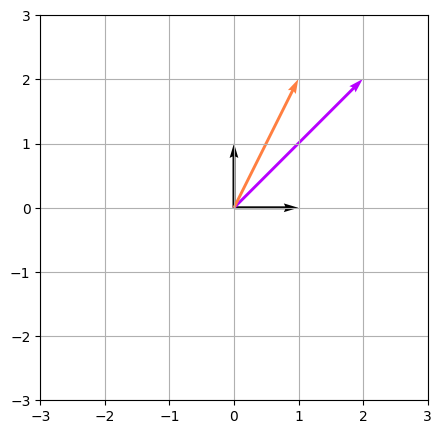

True


In [21]:
v_m = M.dot(purple_1)
plot_vectors([purple_1, v_m], colors=['#b800ff', '#ff7f41'])
print(np.allclose(v_m,orange_1))

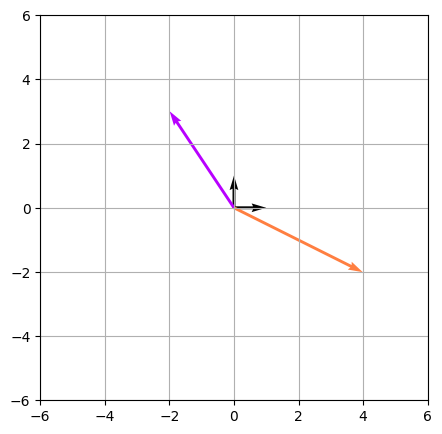

True


In [20]:
v_m = M.dot(purple_2)
plot_vectors([purple_2, v_m], colors=['#b800ff', '#ff7f41'])
print(np.allclose(v_m, orange_2))

Therefore, our transformation matrix $M$ is correctly found.

In [18]:
print(M)

[[-0.5  1. ]
 [ 1.   0. ]]
